<a href="https://colab.research.google.com/github/pasumarthi/EIP3/blob/master/Session5/EIP3_0_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/qubvel/classification_models

### Importing all the required libraries

In [0]:
from keras import backend as k
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential,Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input, Lambda, SpatialDropout2D
import keras
#import keras.backend as k


### Import CIFAR data

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

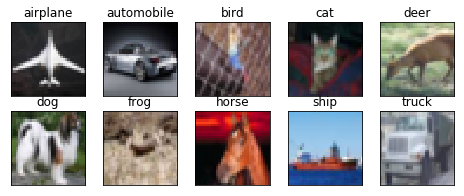

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

###Downloading required Resnet weights

In [0]:
pip install image-classifiers

     |████████████████████████████████| 81kB 3.7MB/s 


https://github.com/qubvel/classification_models

In [0]:
 pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-x_usnrzc
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-x_usnrzc
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-wfj746ry/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


###  Model building using transfer learning

In [0]:
import keras
from classification_models.resnet import ResNet18, preprocess_input

# prepare your data
n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
# x = keras.layers.GlobalAveragePooling2D()(base_model.output)
# output = keras.layers.Dense(n_classes, activation='softmax')(x)

reduce_ch = Conv2D(10, (1,1), use_bias=False)(base_model.output)
avg_pool = GlobalAveragePooling2D()(reduce_ch)
output = Softmax()(avg_pool)  
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

model.summary()

W0702 13:55:13.729934 140621677475712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 13:55:13.758049 140621677475712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 13:55:13.758899 140621677475712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 13:55:13.760789 140621677475712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0702 13:55:13.762200 140621

44924928/44920640 [==============================] - 2s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
____________________________________________

### Model training and accuracy

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0702 13:55:28.940933 140621677475712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=10)`
  from ipykernel import kernelapp as app
W0702 13:55:45.464371 140621677475712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 31s 78ms/step - loss: 0.8920 - acc: 0.6960 - val_loss: 0.8477 - val_acc: 0.7121
Epoch 2/10
390/390 [==============================] - 25s 65ms/step - loss: 0.6186 - acc: 0.7892 - val_loss: 0.6393 - val_acc: 0.7847
Epoch 3/10
390/390 [==============================] - 25s 63ms/step - loss: 0.5423 - acc: 0.8137 - val_loss: 0.7003 - val_acc: 0.7591
Epoch 4/10
390/390 [==============================] - 25s 64ms/step - loss: 0.4841 - acc: 0.8328 - val_loss: 0.7005 - val_acc: 0.7686
Epoch 5/10
390/390 [==============================] - 25s 64ms/step - loss: 0.4424 - acc: 0.8467 - val_loss: 0.5933 - val_acc: 0.8036
Epoch 6/10
390/390 [==============================] - 25s 64ms/step - loss: 0.4082 - acc: 0.8578 - val_loss: 0.7166 - val_acc: 0.7760
Epoch 7/10
390/390 [==============================] - 25s 63ms/step - loss: 0.3755 - acc: 0.8700 - val_loss: 0.6447 - val_acc: 0.7942
Epoch 8/10
390/390 [==============================] - 25s 64ms/step - los

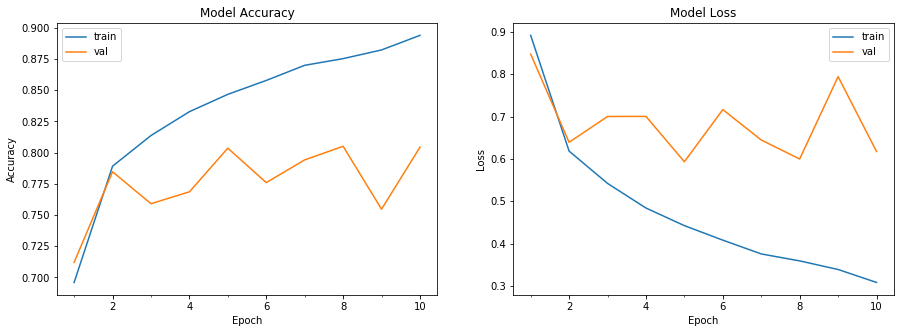

Accuracy on test data is: 80.44


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             )


# train the model

# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1)

plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# List of the misclassified images

In [0]:
predicted = model.predict(test_features)

In [0]:
true_class = np.argmax(test_labels, axis = -1)
pred_classes = np.argmax(predicted, axis = -1)
#misclassified = [[i,x,true_class[i]] for i, x in enumerate(pred_classes) if pred_classes[i]!=true_class[i]]
misclassified = [i for i, x in enumerate(pred_classes) if pred_classes[i]!=true_class[i]]

In [0]:
arr = np.array(misclassified)
arr

array([[   2,    0,    8],
       [  24,    4,    5],
       [  26,    7,    4],
       ...,
       [9989,    4,    2],
       [9991,    7,    0],
       [9993,    3,    5]])

In [0]:
arr.shape

(1956, 3)

In [0]:
import pandas as pd
df = pd.DataFrame(arr,columns=['mis_idx','pred_class','act_label'])
df.set_index('mis_idx',inplace=True)

In [0]:
import cv2
from google.colab.patches import cv2_imshow

###Apply Gradcam on top  50 misclassified images

In [0]:
def gradCam(model, img, layer_name, heatmap_opacity=0.4):
  img = test_features[img]
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)
  grads = k.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = k.mean(grads, axis=(0, 1, 2))
  iterate = k.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  img = np.uint8(255 * img)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 1-heatmap_opacity, heatmap, heatmap_opacity, 0)
  concatimg = cv2.hconcat([img,superimposed_img])
  
  return concatimg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


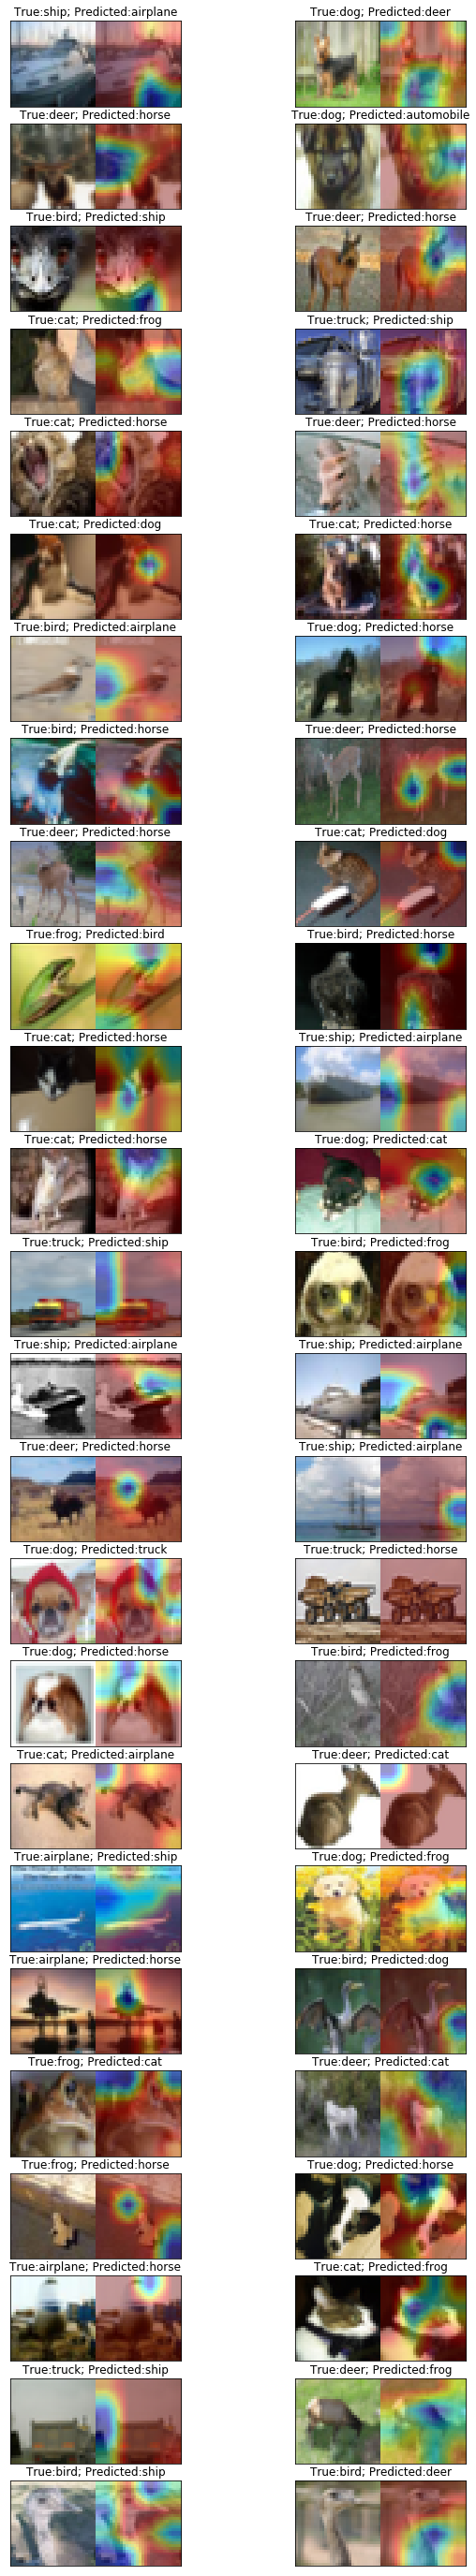

In [0]:
fig = plt.figure(figsize=(10,50))

for i,j in enumerate(misclassified[:50]):
  im = gradCam(model,j,layer_name='stage2_unit2_conv2')  
  ax = fig.add_subplot(25, 2, i+1, xticks=[], yticks=[]) 
  ax.set_title(f'True:{class_names[true_class[j]]}; Predicted:{class_names[pred_classes[j]]}')
  plt.imshow(im)
#   print(i,j[0],class_names[j[1]],class_names[true_class[j[0]]])
  
plt.show()